Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
customer_data = pd.read_excel("HarleyDavidsonSalesData.xlsx", usecols=
                        ['Quantity',
                         'Price',
                         'Payment Mode',
                         'Store Name',
                         'City',
                         'Country',
                         'Year',
                         'Month'])
customer_data.head()

,Quantity,Price,Payment Mode,Store Name,City,Country,Year,Month
0,30,7000,NetBanking,RIDGES HARLEY-DAVIDSON,NYC,USA,2001,2
1,34,7000,Cash,SEVEN ISLANDS HARLEY-DAVIDSON,Reims,France,2001,5
2,41,7000,Credit card,BANJARA HARLEY-DAVIDSON,Paris,France,2001,7
3,45,7000,NetBanking,TUSKER HARLEY-DAVIDSON LAVELLE ROAD,Pasadena,USA,2001,8
4,49,7000,NetBanking,CAPITAL HARLEY-DAVIDSON,San Francisco,USA,2001,10


<Figure size 2500x1000 with 0 Axes>

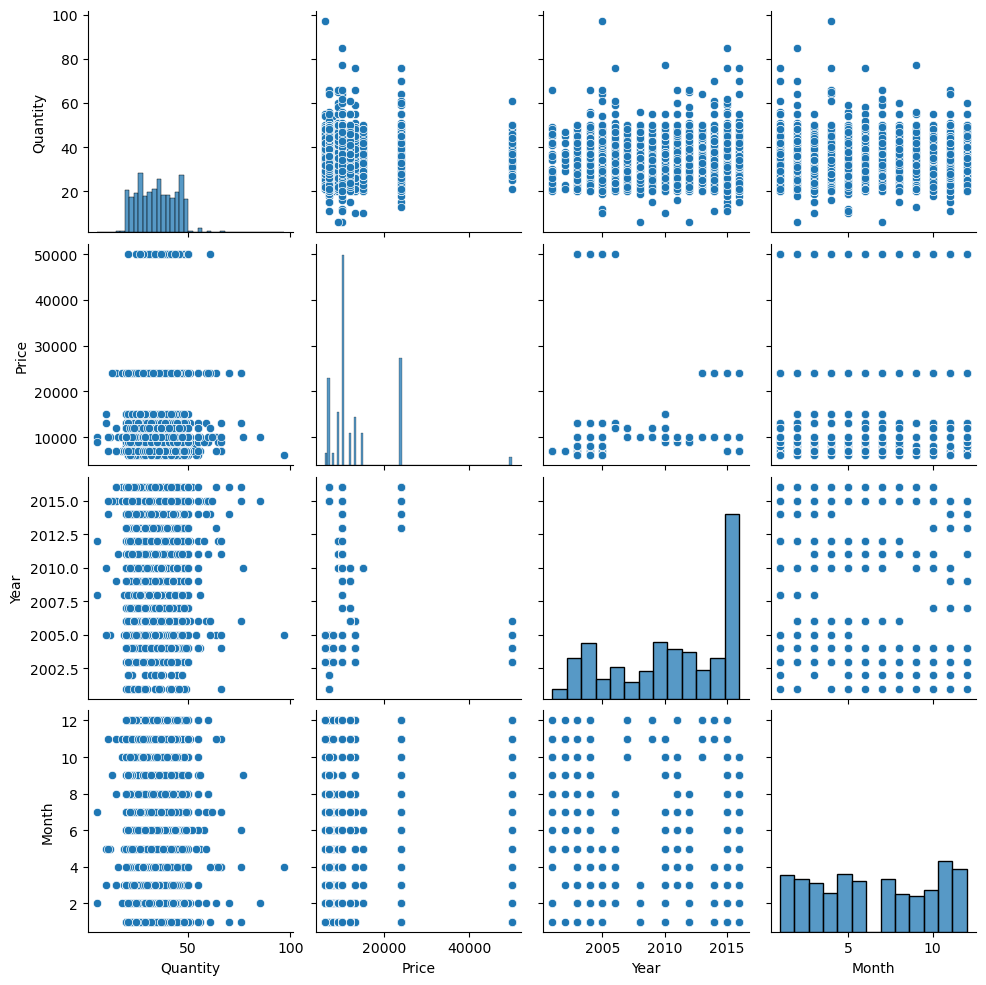

In [17]:
plt.figure(figsize=(25, 10))
sns.pairplot(data = customer_data)
plt.show()

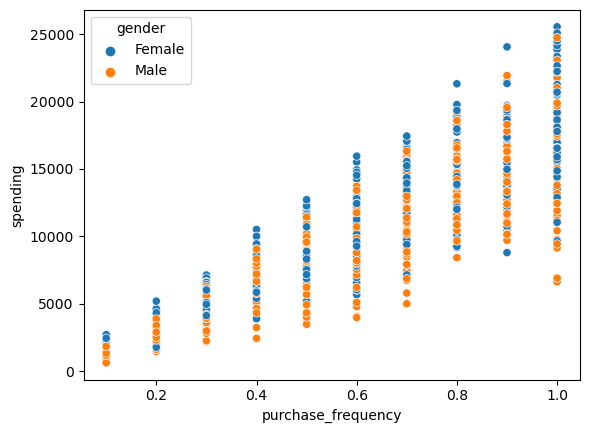

In [4]:
sns.scatterplot(data=customer_data, x = 'purchase_frequency', y = 'spending', hue = 'gender')
plt.show()

In [5]:
normalized_data = preprocessing.normalize(customer_data[['income',
                         'purchase_frequency']])

In [6]:
print(normalized_data)

[[1.00000000e+00 1.66864432e-05]
 [1.00000000e+00 7.27554930e-06]
 [1.00000000e+00 5.26861137e-06]
 ...
 [1.00000000e+00 6.68806849e-06]
 [1.00000000e+00 1.20126304e-05]
 [1.00000000e+00 1.53789370e-05]]


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


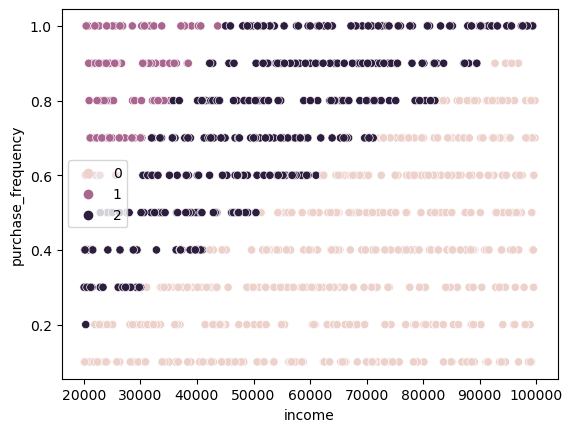

In [8]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(normalized_data)
sns.scatterplot(data = customer_data[['income','purchase_frequency']], x = 'income', y = 'purchase_frequency', hue = kmeans.labels_)
plt.show()

In [9]:
centers = kmeans.cluster_centers_
print("centers ", centers)

centers  [[1.00000000e+00 5.46510349e-06]
 [9.99999999e-01 3.12029098e-05]
 [1.00000000e+00 1.40261847e-05]]


In [10]:
print(silhouette_score(normalized_data,kmeans.labels_, metric = 'euclidean'))

0.5623011475030973
